<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,86.481876,28.548114,-39.308094,85.721897,112.394334,-26.672437
1,0.0,1.0,58.316421,70.464591,261.402260,400.183273,136.091000,264.092273
2,0.0,2.0,24.518425,32.508788,121.913481,188.940694,105.789837,83.150857
3,0.0,3.0,46.635575,22.659673,-16.701070,62.594178,102.533178,-39.939001
4,0.0,4.0,59.416844,83.665291,82.561843,235.643978,145.040642,90.603336
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.484792,79.945656,-256.949863,-136.519414,97.045115,-233.564529
19996,999.0,16.0,99.480982,83.324704,-48.906102,143.899585,178.160381,-34.260796
19997,999.0,17.0,66.914439,86.283888,46.654022,209.852349,142.673209,67.179140
19998,999.0,18.0,95.473652,61.946446,11.368735,178.788833,160.427552,18.361281


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    86.481876  28.548114  -39.308094   85.721897  112.394334   
      1.0    58.316421  70.464591  261.402260  400.183273  136.091000   
      2.0    24.518425  32.508788  121.913481  188.940694  105.789837   
      3.0    46.635575  22.659673  -16.701070   62.594178  102.533178   
      4.0    59.416844  83.665291   82.561843  235.643978  145.040642   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.484792  79.945656 -256.949863 -136.519414   97.045115   
      16.0   99.480982  83.324704  -48.906102  143.899585  178.160381   
      17.0   66.914439  86.283888   46.654022  209.852349  142.673209   
      18.0   95.473652  61.946446   11.368735  178.788833  160.427552   
      19.0   65.790414  36.943429   70.116288  182.850130  111.053588   

                  e_hat  
rep   index              
0.0   0.0    -26.672437  
      1.0    264.092273  
      2.0     83.150857  
      3.0    -39.939001  
      4.0     90.603336  
...                 ...  
999.0 15.0  -233.564529  
      16.0   -34.260796  
      17.0    67.179140  
      18.0    18.361281  
      19.0    71.796542  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    86.481876  28.548114  -39.308094   85.721897  112.394334   
      1.0    58.316421  70.464591  261.402260  400.183273  136.091000   
      2.0    24.518425  32.508788  121.913481  188.940694  105.789837   
      3.0    46.635575  22.659673  -16.701070   62.594178  102.533178   
      4.0    59.416844  83.665291   82.561843  235.643978  145.040642   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.484792  79.945656 -256.949863 -136.519414   97.045115   
      16.0   99.480982  83.324704  -48.906102  143.899585  178.160381   
      17.0   66.914439  86.283888   46.654022  209.852349  142.673209   
      18.0   95.473652  61.946446   11.368735  178.788833  160.427552   
      19.0   65.790414  36.943429   70.116288  182.850130  111.053588   

                  e_hat  
rep   index              
0.0   0.0    -26.672437  
      1.0    264.092273  
      2.0     83.150857  
      3.0    -39.939001  
      4.0     90.603336  
...                 ...  
999.0 15.0  -233.564529  
      16.0   -34.260796  
      17.0    67.179140  
      18.0    18.361281  
      19.0    71.796542  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,86.481876,28.548114,-39.308094,85.721897,112.394334,-26.672437
1,0.0,1.0,58.316421,70.464591,261.402260,400.183273,136.091000,264.092273
2,0.0,2.0,24.518425,32.508788,121.913481,188.940694,105.789837,83.150857
3,0.0,3.0,46.635575,22.659673,-16.701070,62.594178,102.533178,-39.939001
4,0.0,4.0,59.416844,83.665291,82.561843,235.643978,145.040642,90.603336
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.484792,79.945656,-256.949863,-136.519414,97.045115,-233.564529
19996,999.0,16.0,99.480982,83.324704,-48.906102,143.899585,178.160381,-34.260796
19997,999.0,17.0,66.914439,86.283888,46.654022,209.852349,142.673209,67.179140
19998,999.0,18.0,95.473652,61.946446,11.368735,178.788833,160.427552,18.361281


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    86.481876  28.548114  -39.308094   85.721897  112.394334   
      1.0    58.316421  70.464591  261.402260  400.183273  136.091000   
      2.0    24.518425  32.508788  121.913481  188.940694  105.789837   
      3.0    46.635575  22.659673  -16.701070   62.594178  102.533178   
      4.0    59.416844  83.665291   82.561843  235.643978  145.040642   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.484792  79.945656 -256.949863 -136.519414   97.045115   
      16.0   99.480982  83.324704  -48.906102  143.899585  178.160381   
      17.0   66.914439  86.283888   46.654022  209.852349  142.673209   
      18.0   95.473652  61.946446   11.368735  178.788833  160.427552   
      19.0   65.790414  36.943429   70.116288  182.850130  111.053588   

                  e_hat  
rep   index              
0.0   0.0    -26.672437  
      1.0    264.092273  
      2.0     83.150857  
      3.0    -39.939001  
      4.0     90.603336  
...                 ...  
999.0 15.0  -233.564529  
      16.0   -34.260796  
      17.0    67.179140  
      18.0    18.361281  
      19.0    71.796542  

[20000 rows x 6 columns]

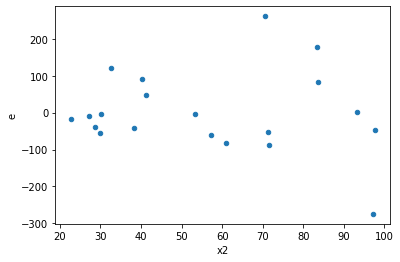

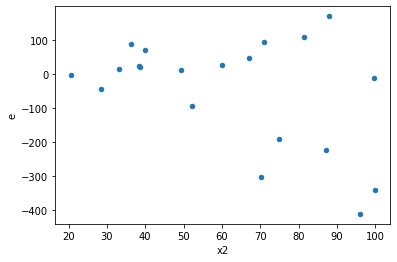

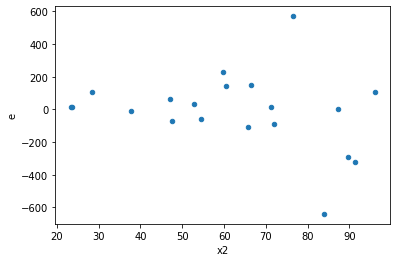

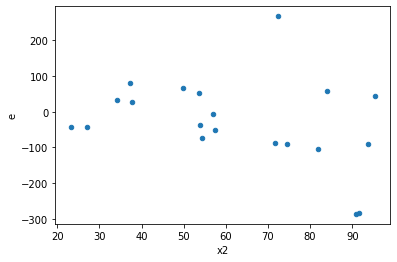

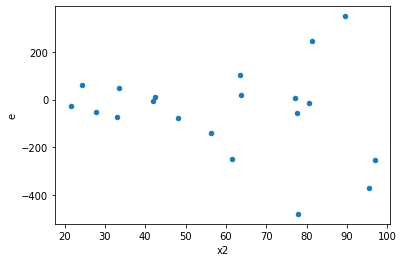

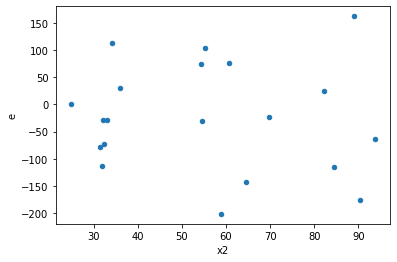

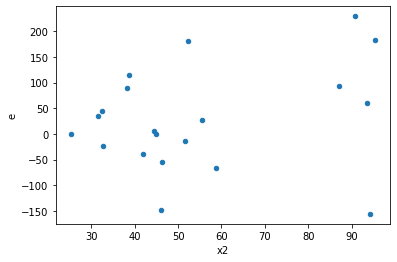

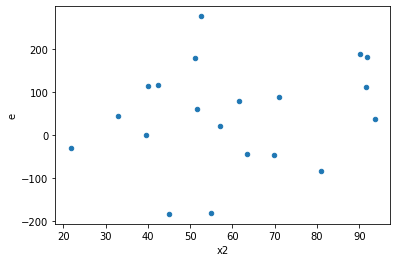

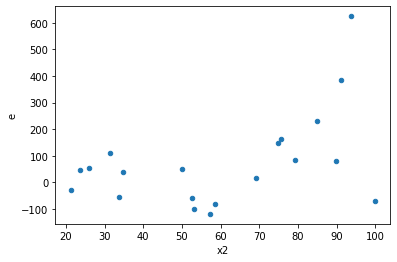

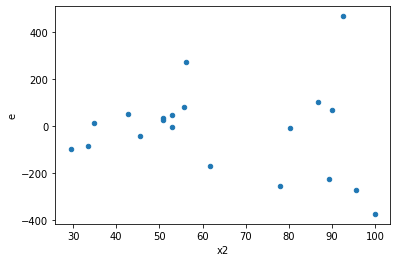

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,9.0,7.0,68292.22028491626,91050.84374489539,7588.024476101807,13007.263392127914,1.7141831095950986,0.4897618678401461,0.755119066079927,0.24488093392007304,Reject005=1 : Homoscedasticity
8.0,11.0,5.0,90122.53621759868,227001.64475931475,8192.957837963517,45400.328951862946,5.541384424254267,0.07153803455176466,0.9642309827241177,0.03576901727588233,Reject005=1 : Homoscedasticity
11.0,9.0,7.0,50075.100121150055,470785.5200290896,5563.900013461117,67255.07428986994,12.087757531076264,0.00342139764302396,0.998289301178488,0.00171069882151198,Reject005=0 : Heteroscedasticity
16.0,9.0,7.0,32108.753987848268,42174.018692426806,3567.639331983141,6024.85981320383,1.68875249221305,0.5021479831676525,0.7489260084161737,0.25107399158382626,Reject005=1 : Homoscedasticity
17.0,8.0,8.0,76032.97195207402,82346.87768193784,9504.121494009252,10293.35971024223,1.0830416800469627,0.9129324889720369,0.5435337555139815,0.45646624448601847,Reject005=1 : Homoscedasticity
18.0,11.0,5.0,9535.144110728228,87850.40330652174,866.8312827934752,17570.080661304346,20.269320005021626,0.003846014360169736,0.9980769928199151,0.001923007180084868,Reject005=0 : Heteroscedasticity
31.0,8.0,8.0,133378.70933692725,379743.0808145481,16672.338667115906,47467.885101818516,2.8471041795379888,0.1601835163999743,0.9199082418000128,0.08009175819998715,Reject005=1 : Homoscedasticity
32.0,5.0,11.0,30024.273488198603,126396.43850809056,6004.854697639721,11490.585318917323,1.913549269299361,0.34347660099634014,0.8282616995018299,0.17173830049817007,Reject005=1 : Homoscedasticity
34.0,9.0,7.0,261485.81491415537,249064.29119782965,29053.979434906152,35580.61302826138,1.224638198288045,0.8072068084440287,0.5963965957779856,0.40360340422201435,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,10.0,132317.4403304468,38345.878609153144,22052.906721741136,3834.587860915314,0.17388128963221602,0.0440931228939187,Reject005=0 : Heteroscedasticity
1.0,7.0,9.0,275250.6134195628,23501.739783643927,39321.516202794686,2611.3044204048806,0.06640904707075583,0.0017075087967331737,Reject005=0 : Heteroscedasticity
2.0,9.0,7.0,751133.4600180017,38530.20529546669,83459.27333533352,5504.315042209527,0.06595210840254473,0.0005128769213805335,Reject005=0 : Heteroscedasticity
3.0,7.0,9.0,161946.23094328318,30497.743328456207,23135.175849040454,3388.638147606245,0.14647125095212066,0.019101246227962852,Reject005=0 : Heteroscedasticity
4.0,10.0,6.0,376725.3250004987,193150.5859068058,37672.53250004987,32191.764317800964,0.8545155364258654,0.7859357921642972,Reject005=1 : Homoscedasticity
5.0,9.0,7.0,68292.22028491626,91050.84374489539,7588.024476101807,13007.263392127914,1.7141831095950986,0.4897618678401461,Reject005=1 : Homoscedasticity
6.0,3.0,13.0,76145.9262968149,80523.86069262632,25381.975432271633,6194.143130202025,0.24403707846657788,0.2718510579784107,Reject005=1 : Homoscedasticity
7.0,11.0,5.0,187854.00243957472,33558.88034453027,17077.636585415883,6711.776068906054,0.39301551097754583,0.1828089242265671,Reject005=1 : Homoscedasticity
8.0,11.0,5.0,90122.53621759868,227001.64475931475,8192.957837963517,45400.328951862946,5.541384424254267,0.07153803455176466,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      628
Reject005=0 : Heteroscedasticity    372
Name: Result_test, dtype: int64